In [2]:
# Lab 1: Data Preprocessing and Statistical Analysis
# **Name:** [Your Name]  
# **Course Title:** MSCS 634: Data Mining  
# **Lab Assignment:** Lab 1 - Data Exploration and Preprocessing

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generating a sample sales dataset for the lab
np.random.seed(42)
data_size = 200
data = {
    'Order_ID': range(1001, 1001 + data_size),
    'Product_Category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Beauty'], data_size),
    'Sales_Amount': np.random.uniform(20, 1000, data_size),
    'Quantity': np.random.randint(1, 10, data_size),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], data_size),
    'Discount_Applied': np.random.choice([0.0, 0.1, 0.2], data_size, p=[0.7, 0.2, 0.1])
}

df = pd.DataFrame(data)

# Injecting some "Dirty Data" for Step 3 (Missing values and Outliers)
df.loc[10:15, 'Sales_Amount'] = np.nan
df.loc[0, 'Sales_Amount'] = 15000  # A massive outlier

# Screenshot 1: Display first five rows
df.head()

,Order_ID,Product_Category,Sales_Amount,Quantity,Region,Discount_Applied
0,1001,Home,15000.000000,4,North,0.0
1,1002,Beauty,643.682203,3,East,0.0
2,1003,Electronics,328.068861,7,West,0.0
3,1004,Home,518.399277,8,South,0.0
4,1005,Home,909.415144,4,West,0.0


/var/folders/yh/l4bmm9d96vv3ctmy4762lg9dt2cjfk/T/ipykernel_70481/1039504784.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Product_Category', y='Sales_Amount', estimator=sum, ax=axes[0], palette='magma')
/var/folders/yh/l4bmm9d96vv3ctmy4762lg9dt2cjfk/T/ipykernel_70481/1039504784.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product_Category', y='Sales_Amount', ax=axes[1], palette='Set2')


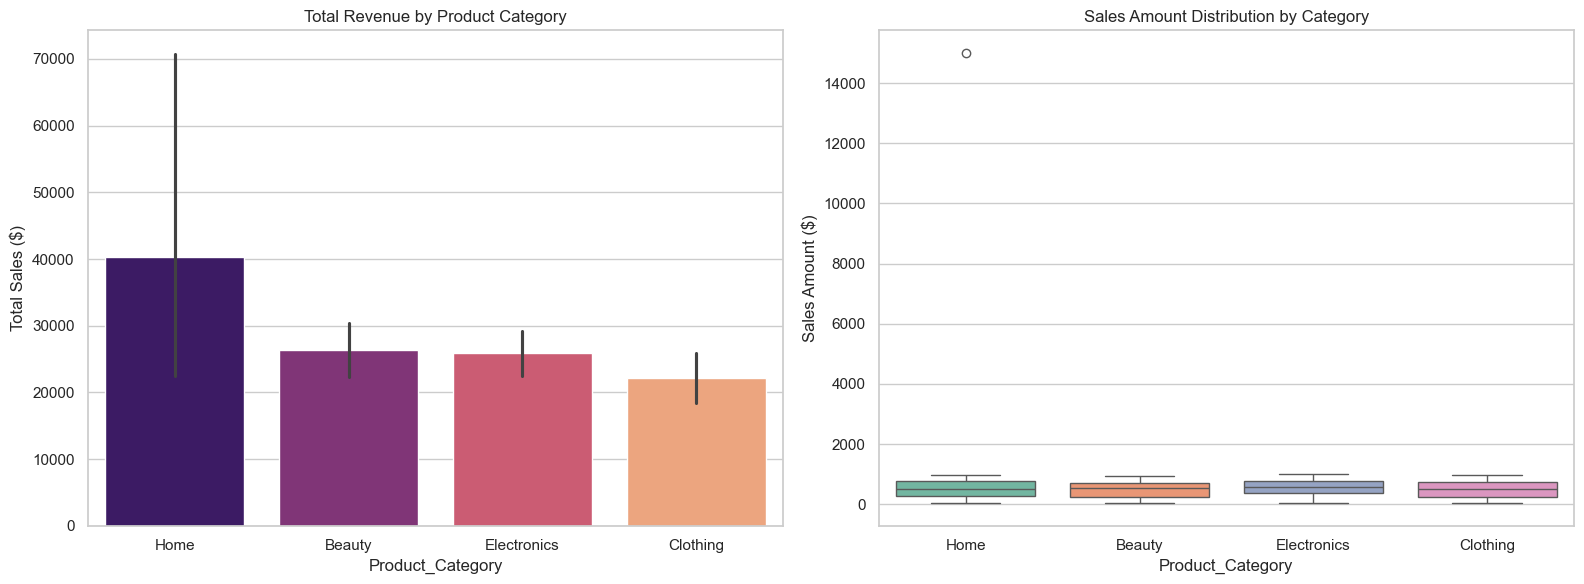

In [6]:
# Set visual style
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Bar Chart: Total Sales by Product Category
sns.barplot(data=df, x='Product_Category', y='Sales_Amount', estimator=sum, ax=axes[0], palette='magma')
axes[0].set_title('Total Revenue by Product Category')
axes[0].set_ylabel('Total Sales ($)')

# 2. Box Plot: Distribution of Sales Amount (Detecting Outliers)
sns.boxplot(data=df, x='Product_Category', y='Sales_Amount', ax=axes[1], palette='Set2')
axes[1].set_title('Sales Amount Distribution by Category')
axes[1].set_ylabel('Sales Amount ($)')

plt.tight_layout()
plt.show()

Handling Missing Value

In [7]:
# Display missing values count
print("Missing Values Before:\n", df.isnull().sum())

# Before Screenshot: Show rows with NaN
screenshot_before_nan = df[df['Sales_Amount'].isnull()]
print("\nRows with missing Sales_Amount:")
print(screenshot_before_nan)

# Handling Missing Values: Fill with Mean
df['Sales_Amount'] = df['Sales_Amount'].fillna(df['Sales_Amount'].mean())

# After Screenshot: Verify no missing values
print("\nMissing Values After:\n", df.isnull().sum())
df.head(15) # Show rows that were previously NaN

Missing Values Before:
 Order_ID            0
Product_Category    0
Sales_Amount        6
Quantity            0
Region              0
Discount_Applied    0
dtype: int64

Rows with missing Sales_Amount:
    Order_ID Product_Category  Sales_Amount  Quantity Region  Discount_Applied
10      1011             Home           NaN         7   West               0.0
11      1012             Home           NaN         5  North               0.0
12      1013             Home           NaN         5   West               0.0
13      1014             Home           NaN         7  South               0.0
14      1015           Beauty           NaN         9   West               0.0
15      1016      Electronics           NaN         5   West               0.0

Missing Values After:
 Order_ID            0
Product_Category    0
Sales_Amount        0
Quantity            0
Region              0
Discount_Applied    0
dtype: int64


,Order_ID,Product_Category,Sales_Amount,Quantity,Region,Discount_Applied
0,1001,Home,15000.000000,4,North,0.0
1,1002,Beauty,643.682203,3,East,0.0
2,1003,Electronics,328.068861,7,West,0.0
3,1004,Home,518.399277,8,South,0.0
4,1005,Home,909.415144,4,West,0.0
5,1006,Beauty,264.306385,2,West,0.0
6,1007,Electronics,422.175265,3,West,0.0
7,1008,Electronics,760.440116,1,South,0.0
8,1009,Home,244.222202,8,West,0.1
9,1010,Clothing,95.440312,3,West,0.0


Outlier Detection and Removal (IQR Technique)

In [8]:
# IQR Calculation
Q1 = df['Sales_Amount'].quantile(0.25)
Q3 = df['Sales_Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify Outliers
outliers = df[(df['Sales_Amount'] < lower_bound) | (df['Sales_Amount'] > upper_bound)]
print(f"IQR: {IQR}")
print(f"Identified Outliers:\n", outliers)

# Remove Outliers
df_no_outliers = df[(df['Sales_Amount'] >= lower_bound) & (df['Sales_Amount'] <= upper_bound)]
print(f"\nDataset size after outlier removal: {len(df_no_outliers)}")

IQR: 482.5074528569411
Identified Outliers:
    Order_ID Product_Category  Sales_Amount  Quantity Region  Discount_Applied
0      1001             Home       15000.0         4  North               0.0

Dataset size after outlier removal: 199


3. Data Reduction

In [9]:
# Before: Display columns
print("Columns before reduction:", df_no_outliers.columns.tolist())

# Dimension Elimination: Drop 'Order_ID'
df_reduced = df_no_outliers.drop(columns=['Order_ID'])

# Sampling: Reduce to 50% of the data
df_sampled = df_reduced.sample(frac=0.5, random_state=42)

# After: Display shape and columns
print("Columns after reduction:", df_sampled.columns.tolist())
print(f"Dataset shape after 50% sampling: {df_sampled.shape}")

Columns before reduction: ['Order_ID', 'Product_Category', 'Sales_Amount', 'Quantity', 'Region', 'Discount_Applied']
Columns after reduction: ['Product_Category', 'Sales_Amount', 'Quantity', 'Region', 'Discount_Applied']
Dataset shape after 50% sampling: (100, 5)


4. Data Scaling and Discretization

In [12]:
from sklearn.preprocessing import MinMaxScaler

# 1. Scaling: Min-Max Scaling
scaler = MinMaxScaler()
df_sampled['Scaled_Sales'] = scaler.fit_transform(df_sampled[['Sales_Amount']])

# 2. Discretization: Binning Sales_Amount into 3 categories
df_sampled['Sales_Level'] = pd.cut(df_sampled['Sales_Amount'], 
                                   bins=3, 
                                   labels=["Low", "Medium", "High"])

# Screenshot Required: Before vs After Scaling/Discretization
df_sampled[['Sales_Amount', 'Scaled_Sales', 'Sales_Level']].head()

,Sales_Amount,Scaled_Sales,Sales_Level
83,879.792566,0.902115,High
16,807.598635,0.825762,High
112,658.922034,0.668521,High
178,707.927540,0.720349,High
77,399.000639,0.393627,Medium


Step 4: Statistical Analysis

1. General Overview of Data

In [13]:
# General Overview
print("--- Dataset Info ---")
df_sampled.info()

print("\n--- Summary Statistics ---")
display(df_sampled.describe())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 83 to 101
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Product_Category  100 non-null    object  
 1   Sales_Amount      100 non-null    float64 
 2   Quantity          100 non-null    int64   
 3   Region            100 non-null    object  
 4   Discount_Applied  100 non-null    float64 
 5   Scaled_Sales      100 non-null    float64 
 6   Sales_Level       100 non-null    category
dtypes: category(1), float64(3), int64(1), object(2)
memory usage: 5.7+ KB

--- Summary Statistics ---


,Sales_Amount,Quantity,Discount_Applied,Scaled_Sales
count,100.000000,100.000000,100.000000,100.000000
mean,526.843147,4.700000,0.031000,0.528834
std,276.391222,2.679891,0.056309,0.292313
min,26.813088,1.000000,0.000000,0.000000
25%,291.342266,2.750000,0.000000,0.279767
50%,554.775428,5.000000,0.000000,0.558375
75%,749.574963,7.000000,0.100000,0.764396
max,972.346441,9.000000,0.200000,1.000000


2. Central Tendency Measures

In [15]:
# Central Tendency for Sales_Amount
central_stats = {
    'Minimum': df_sampled['Sales_Amount'].min(),
    'Maximum': df_sampled['Sales_Amount'].max(),
    'Mean': df_sampled['Sales_Amount'].mean(),
    'Median': df_sampled['Sales_Amount'].median(),
    'Mode': df_sampled['Sales_Amount'].mode()[0] # Mode returns a Series, we take the first value
}

central_df = pd.DataFrame(central_stats, index=['Value']).T
print("Central Tendency Measures:")
display(central_df)

Central Tendency Measures:


,Value
Minimum,26.813088
Maximum,972.346441
Mean,526.843147
Median,554.775428
Mode,591.349777


3. Dispersion Measures

In [16]:
# Dispersion for Sales_Amount
Q1 = df_sampled['Sales_Amount'].quantile(0.25)
Q3 = df_sampled['Sales_Amount'].quantile(0.75)
iqr_val = Q3 - Q1

dispersion_stats = {
    'Range': df_sampled['Sales_Amount'].max() - df_sampled['Sales_Amount'].min(),
    'Q1 (25th)': Q1,
    'Q3 (75th)': Q3,
    'IQR': iqr_val,
    'Variance': df_sampled['Sales_Amount'].var(),
    'Standard Deviation': df_sampled['Sales_Amount'].std()
}

dispersion_df = pd.DataFrame(dispersion_stats, index=['Value']).T
print("Dispersion Measures:")
display(dispersion_df)

Dispersion Measures:


,Value
Range,945.533353
Q1 (25th),291.342266
Q3 (75th),749.574963
IQR,458.232697
Variance,76392.107648
Standard Deviation,276.391222


4. Correlation Analysis

Correlation Matrix:


,Sales_Amount,Quantity,Discount_Applied,Scaled_Sales
Sales_Amount,1.000000,-0.050560,-0.071947,1.000000
Quantity,-0.050560,1.000000,0.075639,-0.050560
Discount_Applied,-0.071947,0.075639,1.000000,-0.071947
Scaled_Sales,1.000000,-0.050560,-0.071947,1.000000


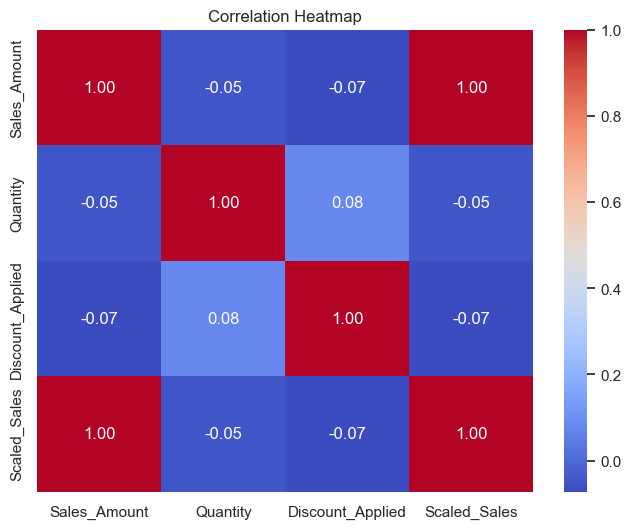

In [18]:
# Compute correlation matrix for numerical columns
correlation_matrix = df_sampled.select_dtypes(include=[np.number]).corr()

print("Correlation Matrix:")
display(correlation_matrix)

# Optional: Visualize it with a heatmap for better insight
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()